In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

# CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
'''
| Pregnancies | 임신 횟수 |
| Glucose | 글루코스 수치 |
| BloodPressure | 혈압 |
| SkinThickness | 피부 두께 |
| Insulin | 인슐린 수치 |
| BMI | BMI 지수 |
| DiabetesPedigreeFunction | 가족력 지표 |
| Age | 나이 |
| Outcome | 당뇨병 유무 |
'''

'\n| Pregnancies | 임신 횟수 |\n| Glucose | 글루코스 수치 |\n| BloodPressure | 혈압 |\n| SkinThickness | 피부 두께 |\n| Insulin | 인슐린 수치 |\n| BMI | BMI 지수 |\n| DiabetesPedigreeFunction | 가족력 지표 |\n| Age | 나이 |\n| Outcome | 당뇨병 유무 |\n'

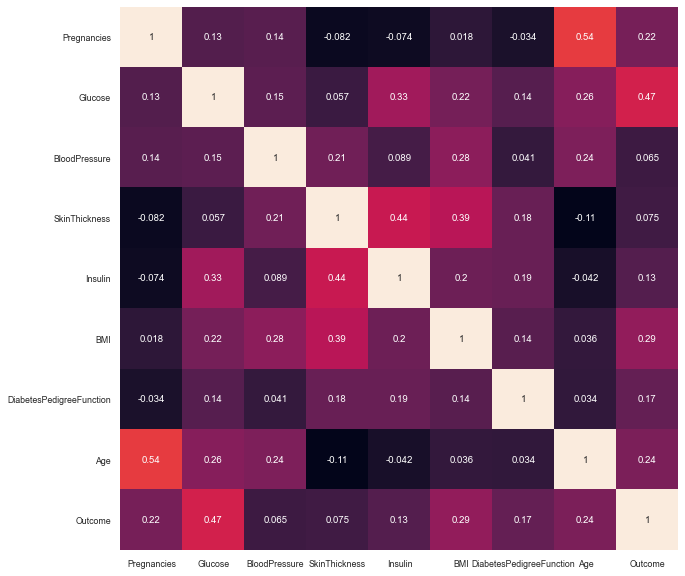

In [8]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Outcome와 높은 건  Glucose

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 원-핫 인코딩

In [12]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [13]:
X = X.values

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 8), (614, 2), (154, 8), (154, 2))

In [25]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))



model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________


In [26]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.2845 - val_mse: 0.2845
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2657 - mse: 0.2657 - val_loss: 0.2538 - val_mse: 0.2538
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2533 - mse: 0.2533 - val_loss: 0.2522 - val_mse: 0.2522
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2534 - mse: 0.2534 - val_loss: 0.2540 - val_mse: 0.2540
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.2534 - mse: 0.2534 - val_loss: 0.2550 - val_mse: 0.2550
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2533 - mse: 0.2533 - val_loss: 0.2551 - val_mse: 0.2551
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2533 - mse: 0.2533 - val_loss: 0.2525 - val_mse: 0.2525
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2527 - mse: 0.25

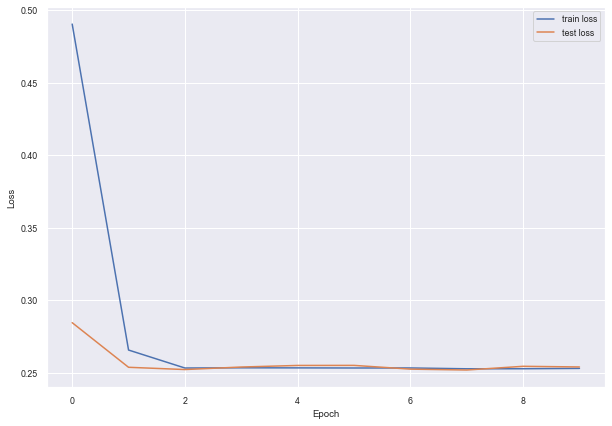

In [27]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2540 - mse: 0.2540


[0.25399234890937805, 0.25399234890937805]